# Predictive Analytics: **Bank Customer Churn Prediction**

Predictive Analytics with *Bank Customer Churn Prediction Datasets*

Naufal Mu'afi<br>
naufalmuafi@mail.ugm.ac.id

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1. Data Loading/Data Wrangling
---

Informasi Dataset :

Jenis | Keterangan
--- | ---
Sumber | [Kaggle Dataset : Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction/data)
Lisensi | Other
Kategori | Finance
Rating Penggunaan | 9.71
Jenis dan Ukuran Berkas | CSV (268 kb)

In [2]:
churn = pd.read_csv("./data/Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Exploratory Data Analysis (EDA)
---

### 2.1 Assesing and Cleaning Data

1. What are the types of variables in the dataset?
2. How variables distribution in the dataset?
3. Are there any missing values?
4. Are there any redundant features?
5. How about the correlation between features and targets?

#### 2.1.1 Variable Description

In [3]:
churn.shape

(10000, 14)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
print(f"\nNumber of duplications: {churn.duplicated().sum()}")


Number of duplications: 0


#### 2.1.2 Variable Distribution Classification

before that, we can drop some unnecessary feature in the dataset

In [7]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
churn.head()
churn.shape

(10000, 11)

Then, we can do a classification to the feature

In [8]:
numerical_features = []
categorical_features = []

nfeatures = len(churn.nunique())

for i in range(nfeatures):
  feature_uniqueness = churn.nunique()
  
  if feature_uniqueness.values[i] <= 25:
    categorical_features.append(feature_uniqueness.index[i])
  else:
    numerical_features.append(feature_uniqueness.index[i])

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
Categorical Features: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


#### 2.1.3 Handle Missing Value

In [9]:
churn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### 2.1.4. Handle The Outliers

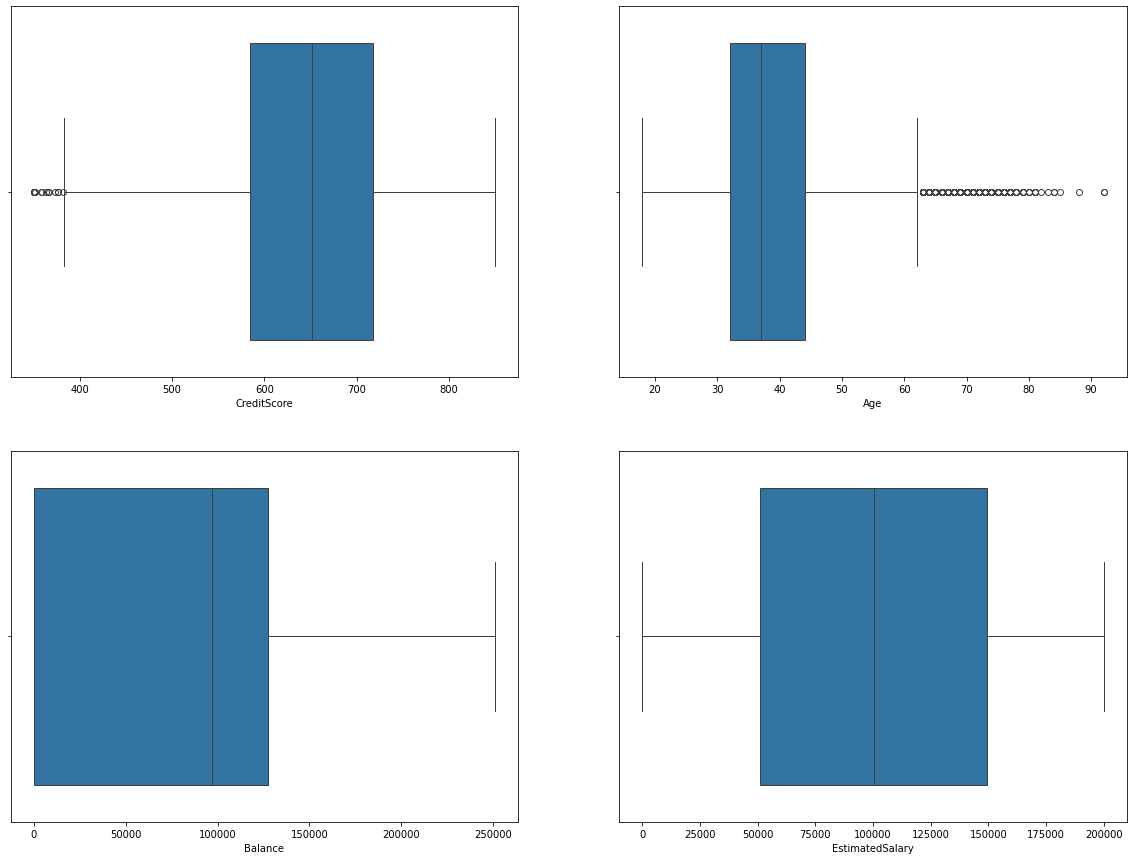

In [10]:
nrows = 2
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 15))

for row in range(nrows):
  for col in range(ncols):
    column = numerical_features[row*ncols + col]
    
    sns.boxplot(x=churn[column], ax=ax[row, col])    

In [11]:
Q1 = churn[numerical_features].quantile(0.25)
Q3 = churn[numerical_features].quantile(0.75)
IQR = Q3-Q1

# # creating a mask for outliers
outlier_mask = ((churn[numerical_features] < (Q1 - 1.5*IQR)) | (churn[numerical_features] > (Q3 + 1.5*IQR))).any(axis=1)

# #filtering out rows with outliers
churn = churn[~outlier_mask]

churn.shape

(9626, 11)

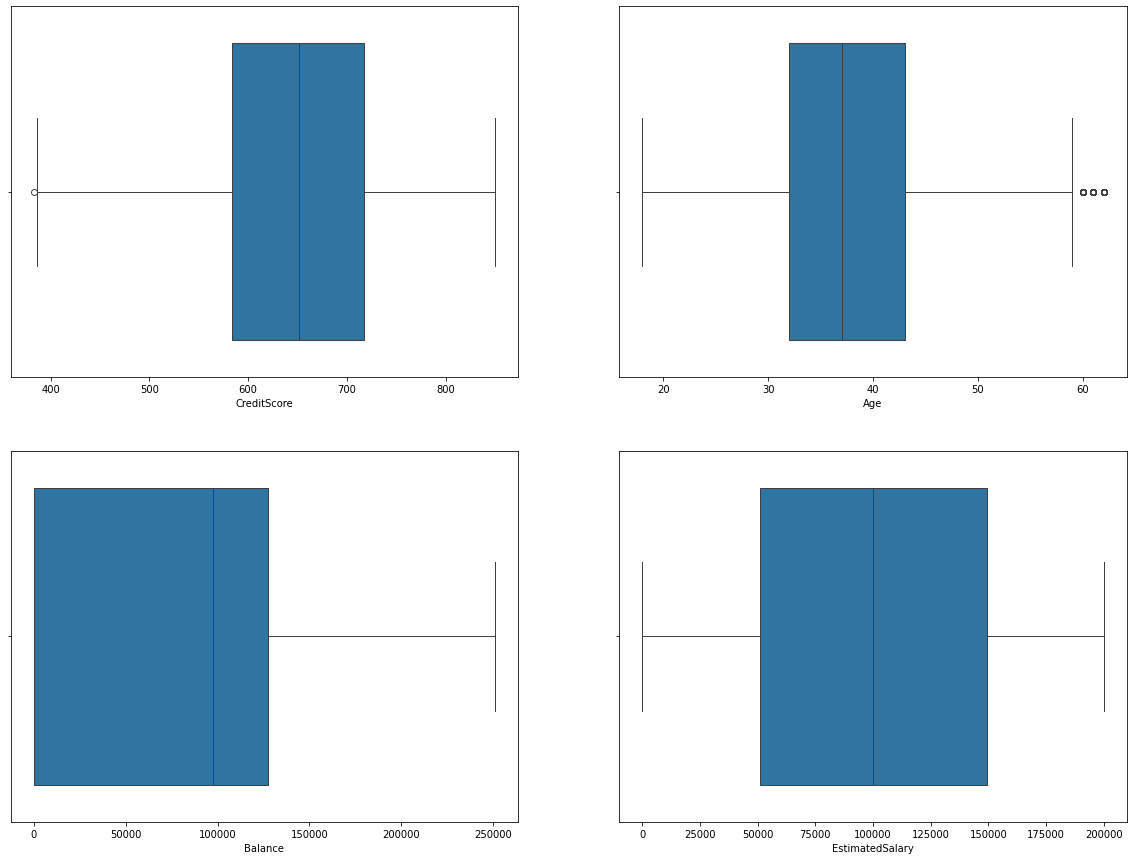

In [12]:
nrows = 2
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 15))

for row in range(nrows):
  for col in range(ncols):
    column = numerical_features[row*ncols + col]
    
    sns.boxplot(x=churn[column], ax=ax[row, col])    

### 2.2 Univariate Analysis for Categorical Features

#### 2.2.1 Geography Feature

           sample total  percentage
Geography                          
France             4826        50.1
Germany            2421        25.2
Spain              2379        24.7


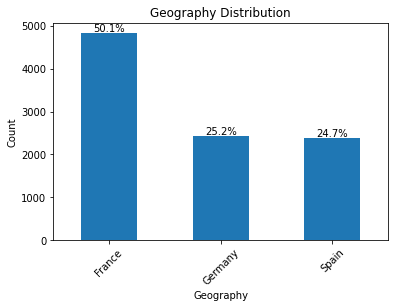

In [13]:
index = 0
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

#### 2.2.2 Gender Feature

        sample total  percentage
Gender                          
Male            5258        54.6
Female          4368        45.4


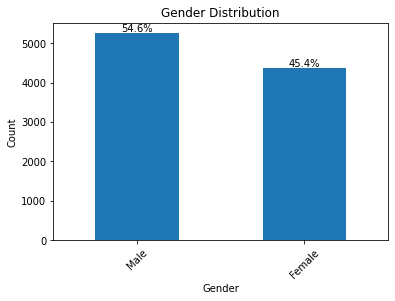

In [14]:
index = 1
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

#### 2.2.3 Tenure Feature

        sample total  percentage
Tenure                          
2               1011        10.5
7                999        10.4
8                997        10.4
1                991        10.3
5                972        10.1
3                971        10.1
4                956         9.9
9                939         9.8
6                927         9.6
10               470         4.9
0                393         4.1


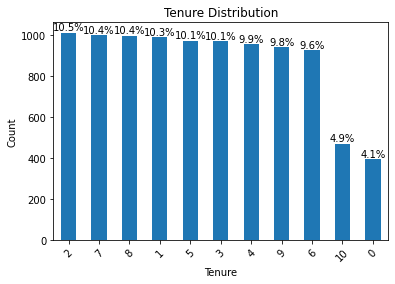

In [15]:
index = 2
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

#### 2.2.4 Num of Product Feature

               sample total  percentage
NumOfProducts                          
1                      4882        50.7
2                      4435        46.1
3                       251         2.6
4                        58         0.6


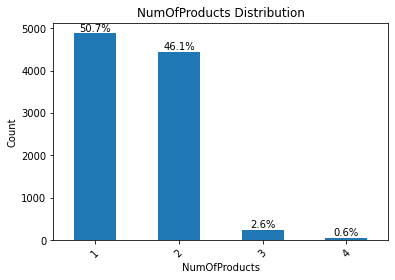

In [16]:
index = 3
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

#### 2.2.5 Has Credit Card Feature

           sample total  percentage
HasCrCard                          
1                  6786        70.5
0                  2840        29.5


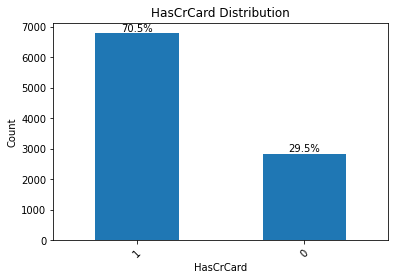

In [17]:
index = 4
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

#### 2.2.6 Is Active Member Feature

                sample total  percentage
IsActiveMember                          
1                       4847        50.4
0                       4779        49.6


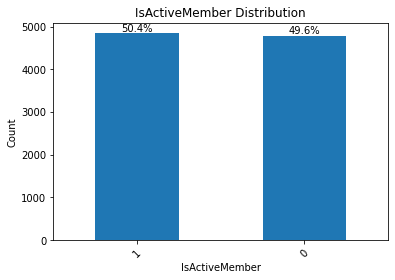

In [18]:
index = 5
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

#### 2.2.7 Exited Feature

        sample total  percentage
Exited                          
0               7677        79.8
1               1949        20.2


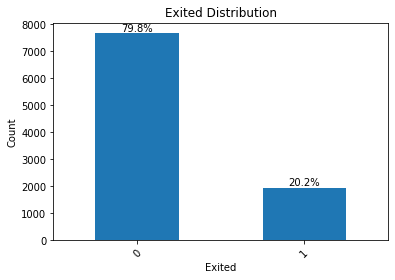

In [19]:
index = 6
feature = categorical_features[index]
count = churn[feature].value_counts()
percent = 100*churn[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample total':count, 'percentage':percent.round(1)})
print(df)

# Plotting the bar chart
ax = count.plot(kind='bar', title=feature)

# Adding labels
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'{feature} Distribution')
plt.xticks(rotation=45)

# Adding data labels on each bar
for i, v in enumerate(count):
    ax.text(i, v + 0.5, f'{percent.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

### 2.3 Univariate Analysis for Numerical Features

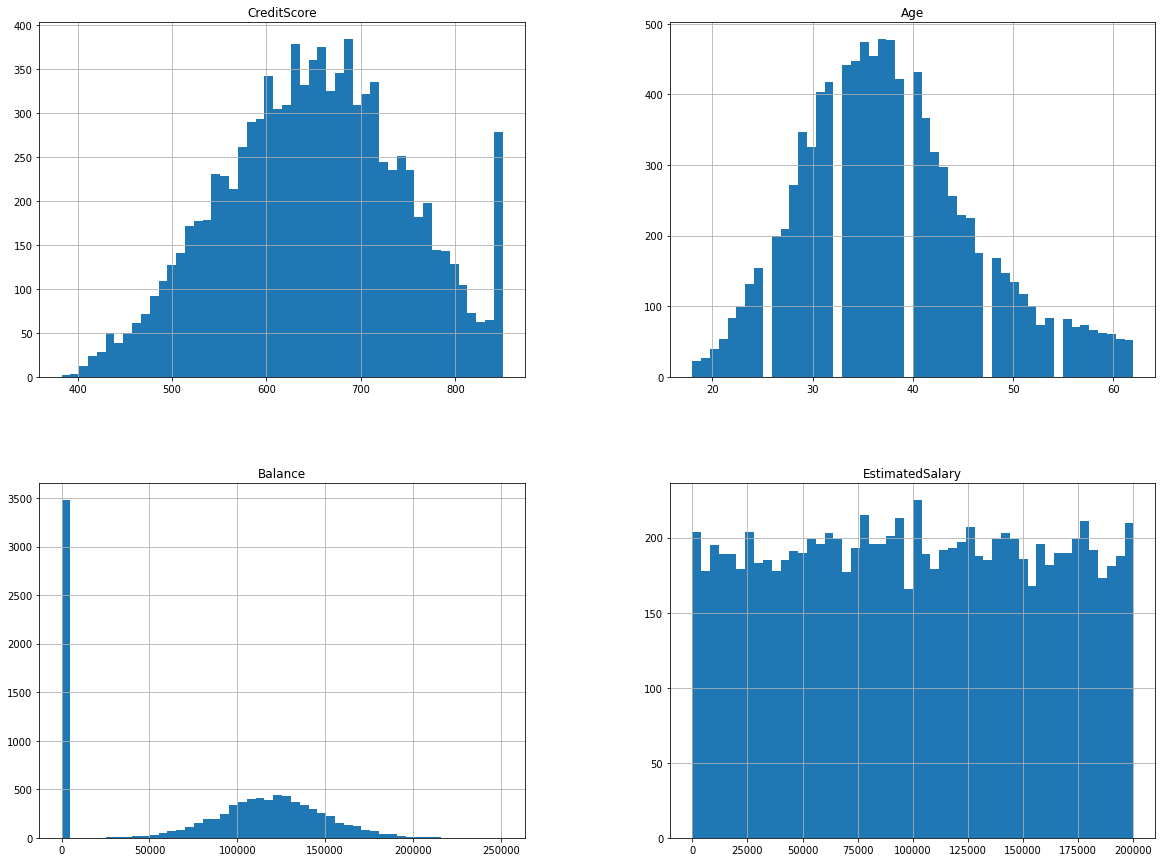

In [20]:
churn[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

### 2.4 Multivariate Analysis

#### 2.4.1 Categorical Features

C:\Users\HP\AppData\Local\Temp\ipykernel_22424\2909749944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Exited', kind='bar', dodge=False, height=4, aspect=3, data=churn, palette="Set3")
C:\Users\HP\AppData\Local\Temp\ipykernel_22424\2909749944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Exited', kind='bar', dodge=False, height=4, aspect=3, data=churn, palette="Set3")
C:\Users\HP\AppData\Local\Temp\ipykernel_22424\2909749944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Exited', kind='bar', do

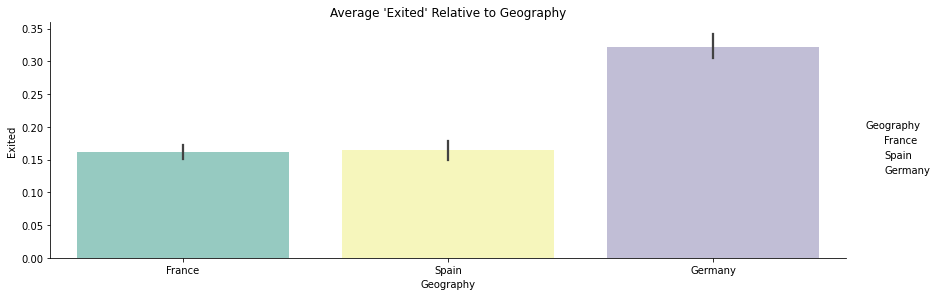

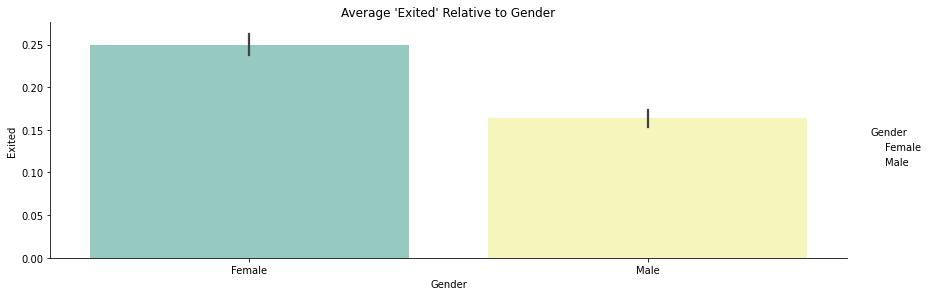

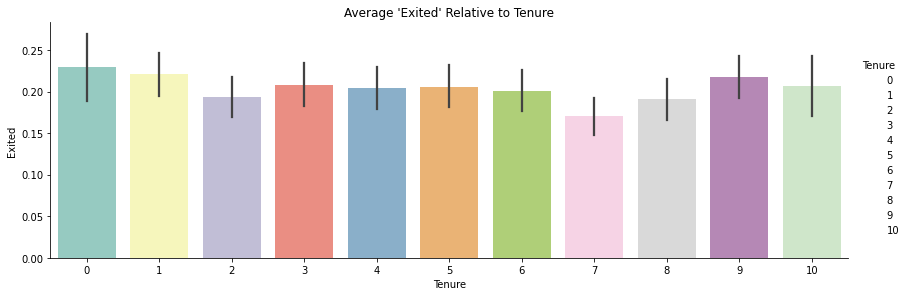

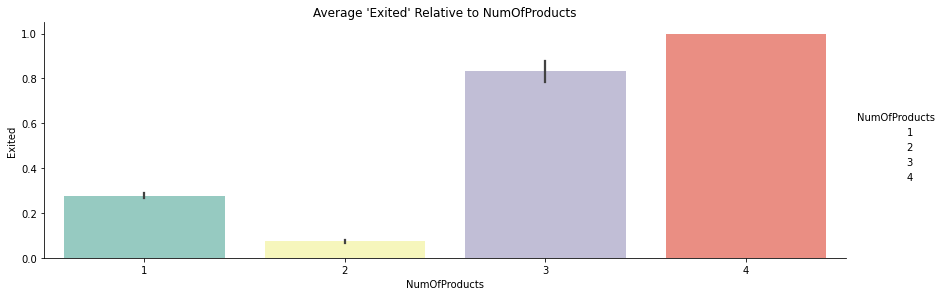

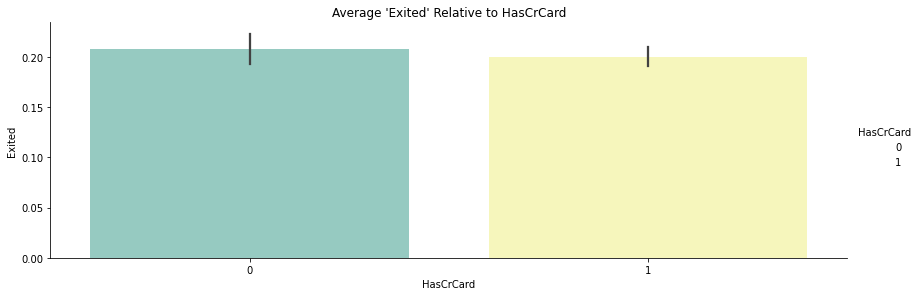

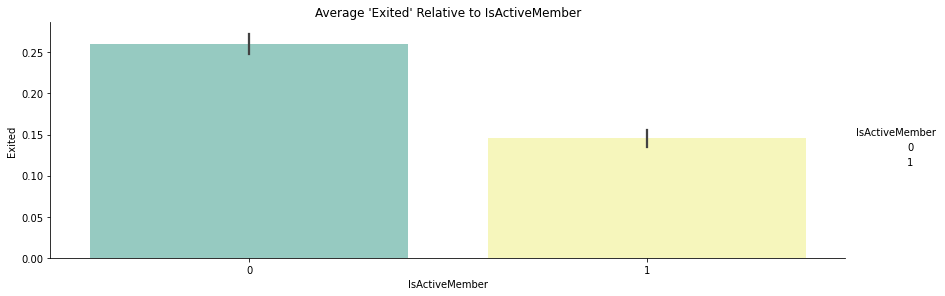

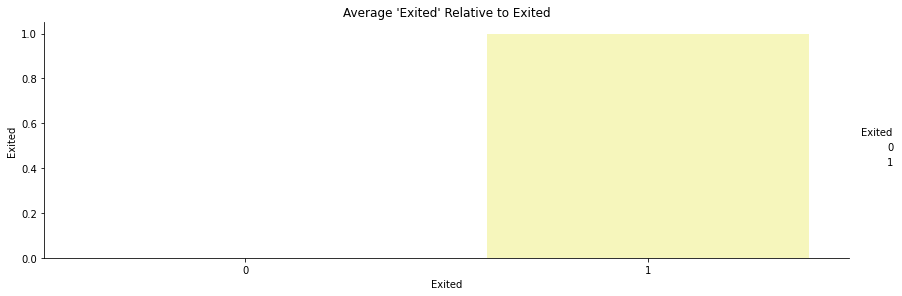

In [21]:
for col in categorical_features:
  sns.catplot(x=col, y='Exited', kind='bar', dodge=False, height=4, aspect=3, data=churn, palette="Set3")
  plt.title(f"Average 'Exited' Relative to {col}")

#### 2.4.1 Numerical Features

##### Pair Plot

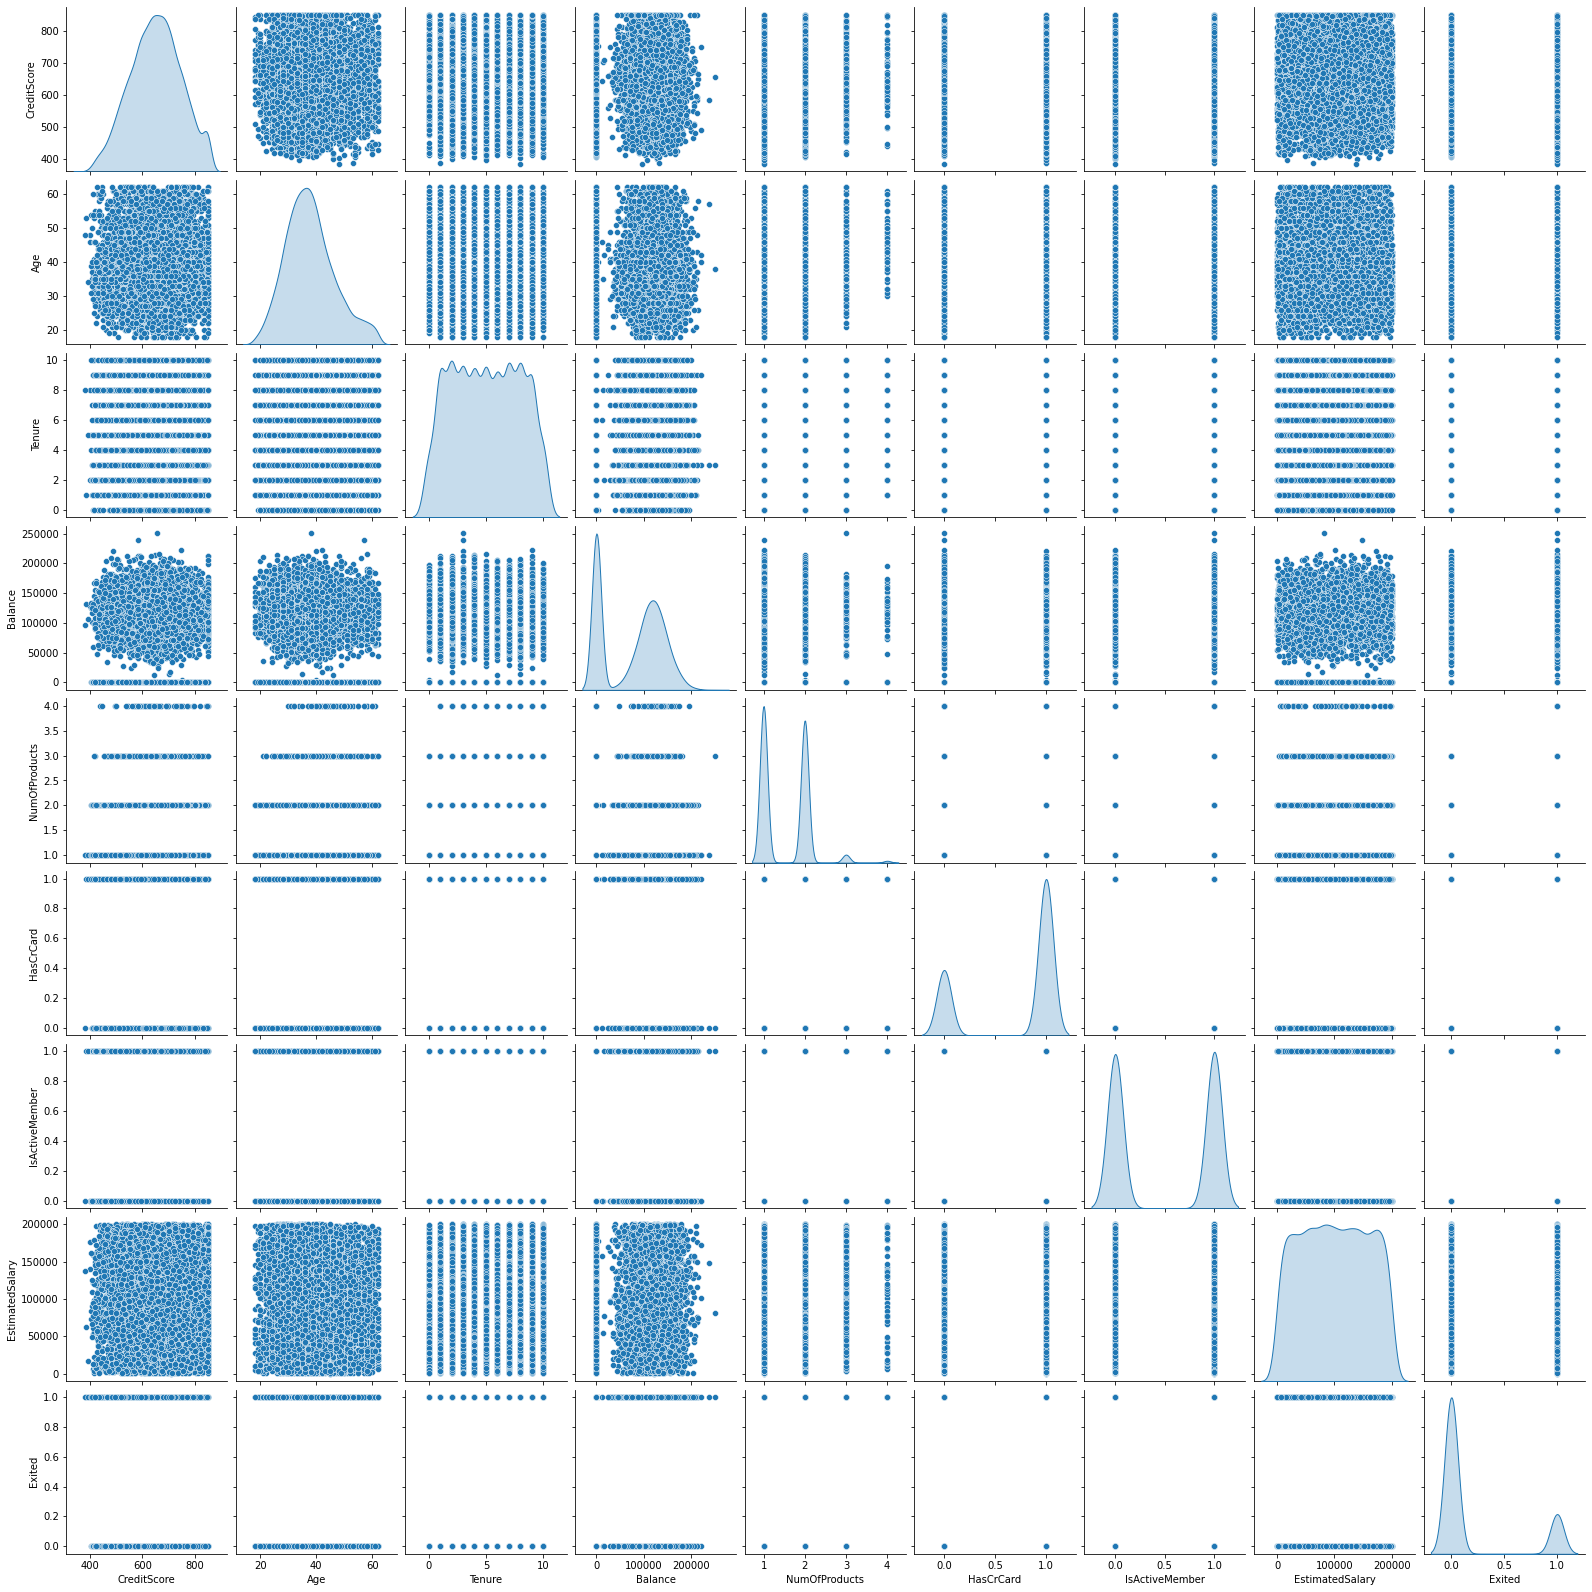

In [22]:
# Observing relationships between numerical features
sns.pairplot(churn, diag_kind = 'kde')

##### Target to Each Categorical Features Corresponding

C:\Users\HP\AppData\Local\Temp\ipykernel_22424\2316771144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn['Exited'], y=churn[column], ax=ax[row, col], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_22424\2316771144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn['Exited'], y=churn[column], ax=ax[row, col], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_22424\2316771144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn['Exited'], y=churn[column], ax=ax[row, col], palette='Set2')
C:\User

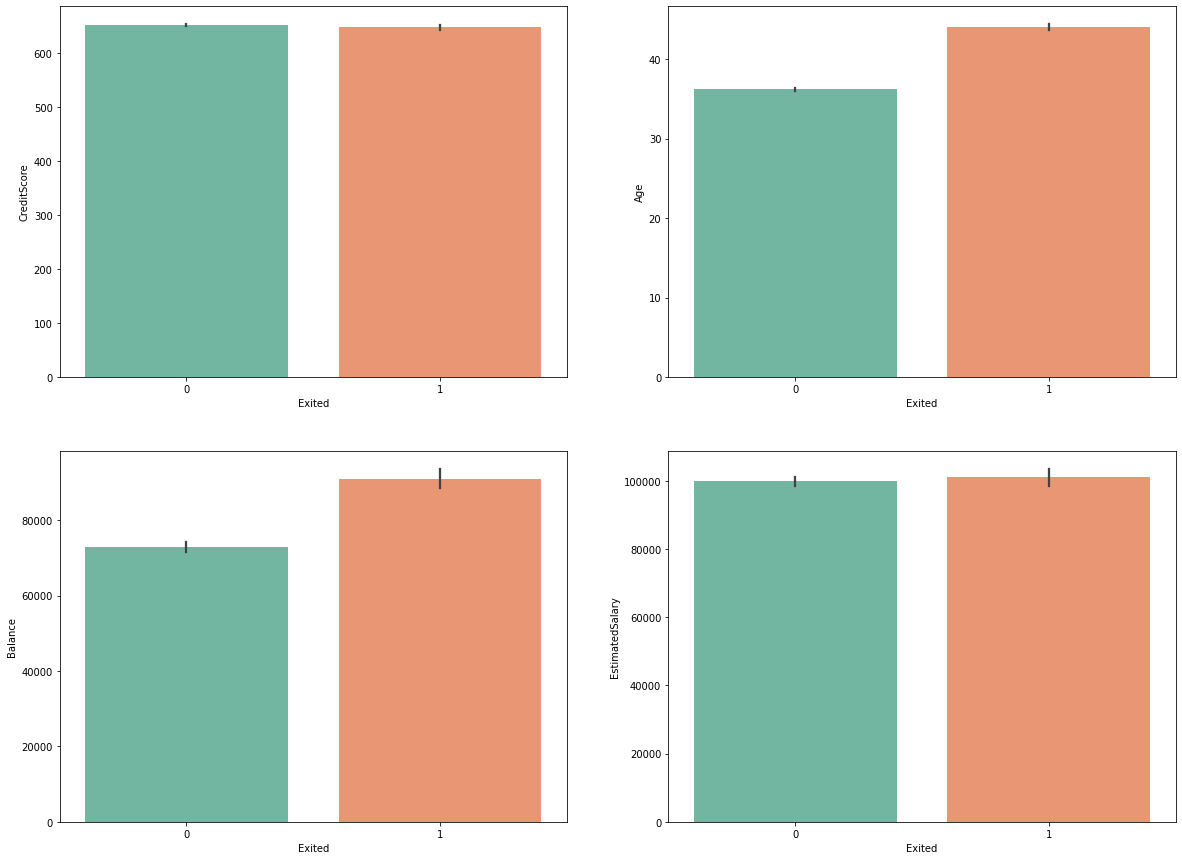

In [23]:
nrows = 2
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 15))

for row in range(nrows):
  for col in range(ncols):
    column = numerical_features[row*ncols + col]
    
    sns.barplot(x=churn['Exited'], y=churn[column], ax=ax[row, col], palette='Set2')

## 3. Data Preparation
---

### 3.1 Category Feature Encoding

In [24]:
churn = pd.get_dummies(churn, columns=['Geography', 'Gender'], dtype=np.int8)
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [25]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9626 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9626 non-null   int64  
 1   Age                9626 non-null   int64  
 2   Tenure             9626 non-null   int64  
 3   Balance            9626 non-null   float64
 4   NumOfProducts      9626 non-null   int64  
 5   HasCrCard          9626 non-null   int64  
 6   IsActiveMember     9626 non-null   int64  
 7   EstimatedSalary    9626 non-null   float64
 8   Exited             9626 non-null   int64  
 9   Geography_France   9626 non-null   int8   
 10  Geography_Germany  9626 non-null   int8   
 11  Geography_Spain    9626 non-null   int8   
 12  Gender_Female      9626 non-null   int8   
 13  Gender_Male        9626 non-null   int8   
dtypes: float64(2), int64(7), int8(5)
memory usage: 799.0 KB


### 3.2 Correlation Analysis

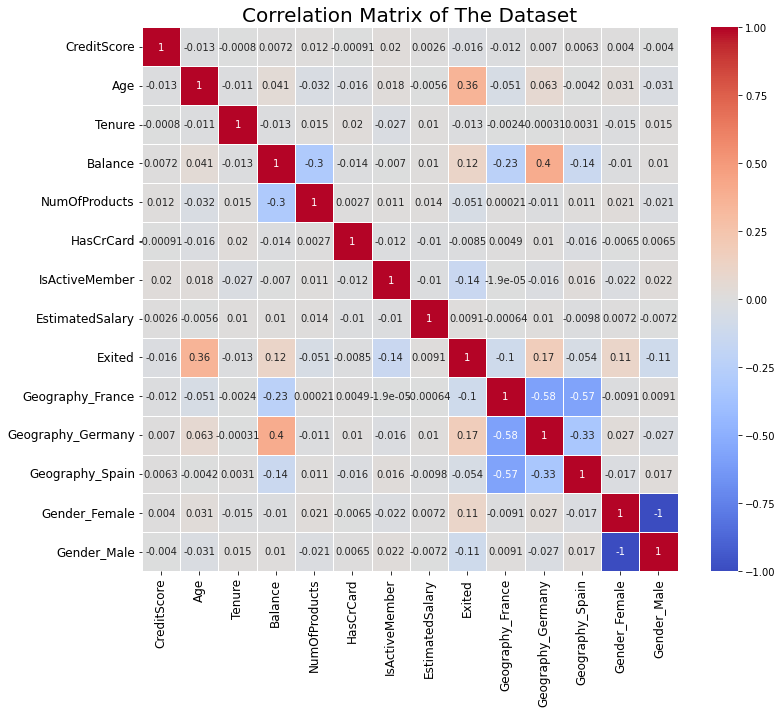

In [26]:
plt.figure(figsize=(12,10))
corr_matrix = churn.corr()

sns.heatmap(data=corr_matrix,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5)

plt.title('Correlation Matrix of The Dataset', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 3.3 Train Test Split

In [27]:
X = churn.drop(['Exited'], axis=1)
y = churn['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9626
Total # of sample in train dataset: 7700
Total # of sample in test dataset: 1926


### 3.4 Feature Scaling

In [28]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,CreditScore,Age,Balance,EstimatedSalary
2278,-1.841190,-0.540442,0.787577,0.781928
3161,-1.872366,-0.427280,-1.221989,-0.198238
6914,0.538543,0.251689,1.102353,0.602711
2361,0.372274,0.591173,1.251031,0.889219
9187,-0.511033,0.025366,-0.263520,-1.079990


In [29]:
X_train[numerical_features].describe().round(4)

,CreditScore,Age,Balance,EstimatedSalary
count,7700.0000,7700.0000,7700.0000,7700.0000
mean,0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-2.7765,-2.2379,-1.2220,-1.7358
25%,-0.6877,-0.6536,-1.2220,-0.8537
50%,0.0086,-0.0878,0.3323,0.0018
75%,0.6970,0.5912,0.8179,0.8581
max,2.0765,2.7412,2.7851,1.7204


## 4. Model Development
---

In [30]:
# prepare the dataframe for model analysis
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['KNN', 'LogisticRegression', 'SVC'])

### 4.1 K-Nearest Neighbourhood Algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_acc', 'knn'] = accuracy_score(y_pred=knn.predict(X_train), y_true=y_train)

### 4.2 Logistic Regression Algorithm

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=123)
log_reg.fit(X_train, y_train)

models.loc['train_acc', 'LogisticRegression'] = accuracy_score(y_pred=log_reg.predict(X_train), y_true=y_train)

### 4.3 Support Vector Classifier Algorithm

In [33]:
from sklearn.svm import SVC

svc = SVC(C=2.0, kernel='rbf')
svc.fit(X_train, y_train)

models.loc['train_acc', 'SVC'] = accuracy_score(y_pred=svc.predict(X_train), y_true=y_train)

## 5. Model Evaluation
---

In [34]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [35]:
acc = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'LogisticRegression', 'SVC'])
model_dict = {'KNN': knn, 'LogisticRegression':log_reg, 'SVC':svc}

# calculate MSE for each algorithm in train and test dataset
for name, model in model_dict.items():
  acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
  acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

acc

,train,test
KNN,0.844675,0.826064
LogisticRegression,0.825195,0.82243
SVC,0.845195,0.839564


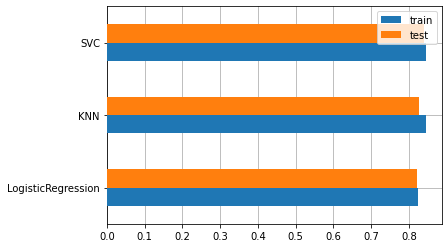

In [36]:
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [41]:
prediction = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}

for name, model in model_dict.items():
  pred_dict['prediction_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_LogisticRegression,prediction_SVC
9725,1,0,0,0
